In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from qsogen_4_catalog.qsosed import Quasar_sed
import scipy.stats as stats
import os

In [6]:
sed = Quasar_sed(30, AGN_type=2)

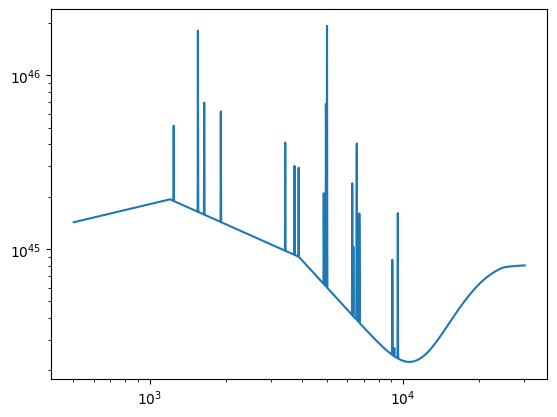

In [7]:
fig, ax = plt.subplots()
ax.loglog(sed.wavlen, sed.lum)

In [5]:
print(sed.nlr_template_idx)

None


In [5]:
0.25*1e4

2500.0

In [6]:
directory = "qsogen_4_catalog/narrow_lines"
catalog_file = os.path.join(directory, "line_catalog.dat")
lines_catalog = pd.read_csv(catalog_file, sep =' ')
line_wavlen = lines_catalog["wavelen"].to_numpy()
line_labels = lines_catalog["labels"].to_list()
feltre = pd.read_csv(os.path.join(directory,"A_Feltre_reduced.dat"), sep =' ')

In [7]:
lbol_giusta = []
lbol_bc = []
l2500_array =  np.linspace(27,33)
for l2500 in l2500_array:
    sed_1 = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, wavlen = np.logspace(2.9, 5.5, 5000), LogL2kev=lusso(l2500))
    sed_2 = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, wavlen = np.logspace(2.9, 5.5, 5000))
    sed_continuo = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, add_NL=False, 
                          wavlen = np.logspace(2.9, 5.5, 5000), LogL2kev=lusso(l2500))
    print(sed_1.Lbol,sed_2.Lbol)
    lbol_giusta.append(sed_1.Lbol)
    lbol_bc.append(sed_2.Lbol)
    

8.640026463323854e+42 7.516035799258668e+42
1.105400285715157e+43 9.815247092192643e+42
1.416099591708756e+43 1.2817804232691172e+43
1.816454180593927e+43 1.673886595053547e+43
2.332907823516117e+43 2.1859409632375729e+43
2.999844250406492e+43 2.8546365738756333e+43
3.8620055658489956e+43 3.7278911489169844e+43
4.977655732347161e+43 4.868280798107312e+43
6.422720751342674e+43 6.357524128918214e+43
8.296209704359583e+43 8.302338079079381e+43
1.0727316192762698e+44 1.0842085091867409e+44
1.3884725163227512e+44 1.415875961923347e+44
1.7988815151461053e+44 1.8490029570567396e+44
2.3327663170764312e+44 2.414626723770635e+44
3.0278045359122005e+44 3.1532790106665e+44
3.933300288939619e+44 4.117890529921263e+44
5.11380382999455e+44 5.37758389253067e+44
6.653866024167889e+44 7.022626830674457e+44
8.664285468121502e+44 9.170900647669904e+44
1.1290319382926563e+45 1.1976347414910943e+45
1.4722478752662338e+45 1.5640001229223516e+45
1.9210725037443287e+45 2.0424394013951706e+45
2.5083145311046513

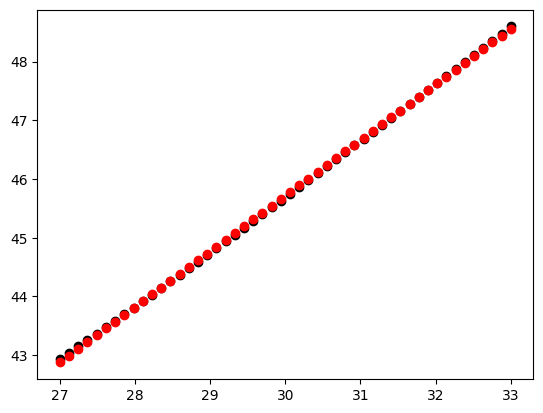

In [8]:
fig, ax = plt.subplots()
ax.scatter(l2500_array, np.log10(lbol_giusta), c = 'k')
ax.scatter(l2500_array, np.log10(lbol_bc), c = 'r')

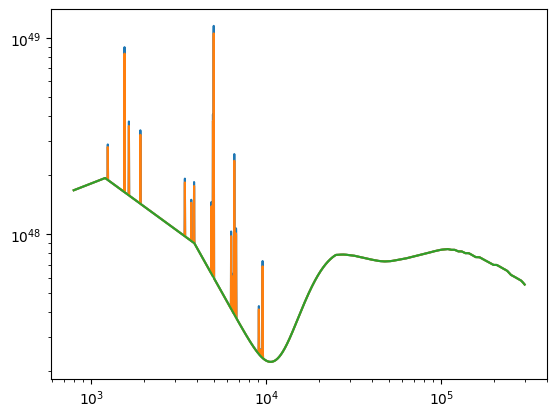

In [9]:
fig, ax = plt.subplots()
ax.plot(sed_1.wavlen, sed_1.lum)
ax.plot(sed_2.wavlen, sed_2.lum)
ax.plot(sed_continuo.wavlen, sed_continuo.lum)


ax.set_xscale('log')
ax.set_yscale('log')

In [10]:
x = glob.glob("qsogen_4_catalog/narrow_lines/NL_templates/nlr*")
fname  =x[0]
sed = np.genfromtxt(fname)
print(fname)

qsogen_4_catalog/narrow_lines/NL_templates/nlr_-1.5_0.008_0.3_3.0_-1.7_800.0.dat


In [11]:
feltre.iloc[1,:][line_labels].to_numpy()

array([-3.12623777, -2.23619778, -2.74325821, -2.7969399 , -3.09347102,
       -3.3260212 , -3.09813319, -3.19495474, -2.52002182, -2.04145045,
       -3.27946034, -3.77577781, -4.58967838, -2.74074069, -4.11970101,
       -3.34816978, -3.4747219 , -3.7932011 , -3.39875508, -4.03127896,
       -4.27748125, -4.48504073, -4.6618225 , -4.81567773])

In [12]:
wavlen = np.logspace(3,4, 5000)
line_lum = 10**feltre.iloc[1,:][line_labels].to_numpy()
template = get_template(wavlen, line_wavlen, line_lum, 800)

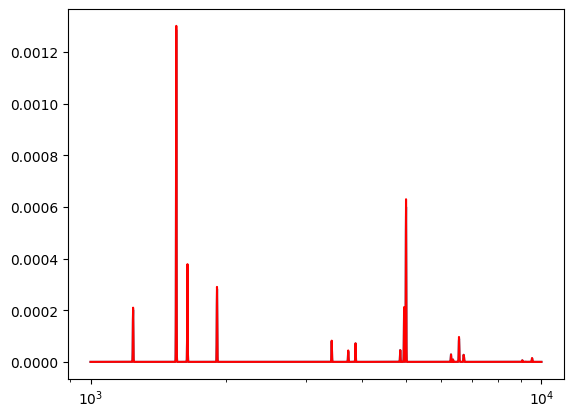

In [13]:
fig, ax = plt.subplots()
ax.plot(sed[:,0], sed[:,1])
ax.plot(wavlen, template, c ='r')
ax.set_xscale("log")

In [14]:
fname

'qsogen_4_catalog/narrow_lines/NL_templates/nlr_-1.5_0.008_0.3_3.0_-1.7_800.0.dat'

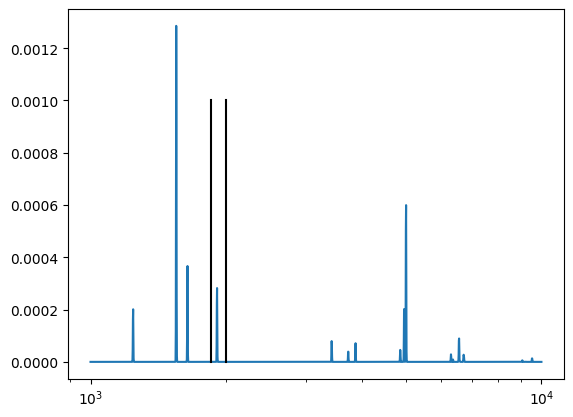

In [15]:
wmin, wmax = 1850, 2000

fig, ax = plt.subplots()
ax.plot(sed[:,0], sed[:,1])
ax.plot([wmin, wmin], [0, 0.001], c ='k')
ax.plot([wmax, wmax], [0, 0.001], c ='k')
ax.set_xscale("log")

In [16]:
logic = (sed[:,0]>=wmin) & (sed[:,0]<=wmax)
line = np.trapz(sed[logic,1], sed[logic,0])
print(np.log10(line))

logic = (wavlen>=wmin) & (wavlen<=wmax)
line = np.trapz(template[logic], wavlen[logic])
print(np.log10(line))


logic = (sed_continuo.wavlen>=wmin) & (sed_continuo.wavlen<=wmax)
continuo = np.trapz(sed_continuo.lum[logic]/sed_continuo.wavlen[logic],sed_continuo.wavlen[logic])

logic = (sed_1.wavlen>=wmin) & (sed_1.wavlen<=wmax)
line = np.trapz(sed_1.lum[logic]/sed_1.wavlen[logic],sed_1.wavlen[logic])
line = line - continuo
print(np.log10(line/sed_1.Lbol))


logic = (sed_2.wavlen>=wmin) & (sed_2.wavlen<=wmax)
line = np.trapz(sed_2.lum[logic]/sed_2.wavlen[logic],sed_2.wavlen[logic])
line = line - continuo
print(np.log10(line/sed_2.Lbol))

print(continuo)




-2.796939806100572
-2.7969398870473325
-2.797567072946418
-2.7975670729464186
1.1073107232952302e+47


In [17]:
sed = Quasar_sed(LogL2500=30, AGN_type = 1, emline_scatter = 0, bbnorm_scatter= 0.0)
sed_2 = Quasar_sed(LogL2500=30, AGN_type = 1, add_NL=False)

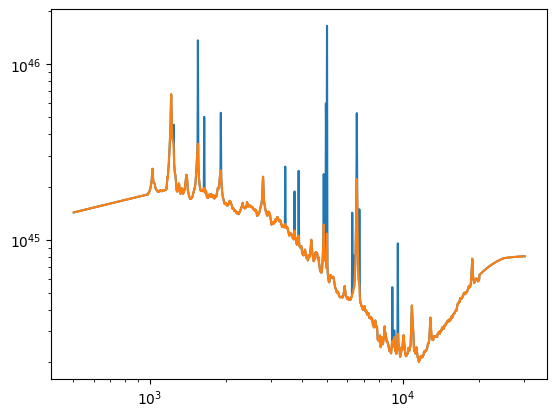

In [18]:
fig, ax = plt.subplots()
ax.plot(sed.wavlen, sed.lum)
ax.plot(sed_2.wavlen, sed_2.lum)
ax.set_xscale('log')
ax.set_yscale('log')

In [19]:
def get_template(wavlen, line_wavlen, line_lum, fwhm):
    xx = np.repeat(np.expand_dims(wavlen, axis =1), len(line_wavlen), axis =1)
    stddev = ((fwhm/2.998e5)*line_wavlen)/2.335  #fwhm(km/s)---> fwhm(delta_lambda) ---> stddev
    template = (line_lum*stats.norm.pdf(xx, loc = line_wavlen, scale=stddev)).sum(axis =1)
    return template

In [20]:
lbol_giusta = []
lbol_bc = []
l2500_array =  np.linspace(31,32.5)
for l2500 in l2500_array:
    sed_1 = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, wavlen = np.logspace(2.9, 5.5, 5000), LogL2kev=lusso(l2500))
    sed_2 = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, wavlen = np.logspace(2.9, 5.5, 5000))
    sed_continuo = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, add_NL=False, 
                          wavlen = np.logspace(2.9, 5.5, 5000), LogL2kev=lusso(l2500))
    print(np.log10(sed_1.Lbol),np.log10(sed_2.Lbol))
    lbol_giusta.append(sed_1.Lbol)
    lbol_bc.append(sed_2.Lbol)

46.64918928146073 46.66246047999999
46.678740040064106 46.691438579285716
46.70830065269632 46.720416678571425
46.7378710036516 46.74939477785714
46.76745097863107 46.77837287714286
46.7970404647296 46.807350976428566
46.826639350422624 46.83632907571428
46.8562475255529 46.865307175
46.88586488131722 46.894285274285714
46.91549131025308 46.92326337357143
46.94512670622537 46.95224147285714
46.974770964412976 46.981219572142855
47.00442398129543 47.01019767142857
47.034085654639526 47.03917577071428
47.06375588348594 47.068153869999996
47.09343456813588 47.09713196928571
47.123121610137694 47.12611006857142
47.15281691227357 47.15508816785714
47.182520378546194 47.18406626714285
47.21223191416549 47.21304436642857
47.241951425535355 47.242022465714285
47.27167882024045 47.271000564999994
47.30141400703306 47.29997866428571
47.33115689581992 47.328956763571426
47.360907397649214 47.357934862857135
47.39066542469752 47.38691296214286
47.42043089025686 47.41589106142857
47.450203708721844

In [21]:
l2500 = 31.1
sed = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, wavlen = np.logspace(2.9, 5.5, 50000),
                 LogL2kev=lusso(l2500))
sed_continuo = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, add_NL=False, 
                          wavlen = np.logspace(2.9, 5.5, 50000), LogL2kev=lusso(l2500))
sed_1 = Quasar_sed(LogL2500=l2500, AGN_type = 1, ebv = 0.0, add_NL=False, 
                          wavlen = np.logspace(2.9, 5.5, 50000), LogL2kev=lusso(l2500))

print(np.log10(sed.Lbol), np.log10(sed_continuo.Lbol))

46.74578249092597 46.74578249092597


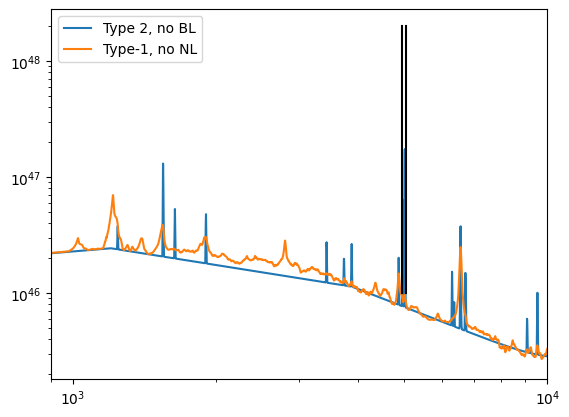

In [22]:
wmin, wmax = 4930, 5040

fig, ax = plt.subplots()
ax.plot(sed.wavlen, sed.lum, label= "Type 2, no BL")
ax.plot(sed_1.wavlen, sed_1.lum, label = "Type-1, no NL")
ax.plot([wmin, wmin], [1e46, 2e48], c ='k')
ax.plot([wmax, wmax], [1e46, 2e48], c ='k')
ax.legend()
ax.set_xlim(900, 10000)
ax.set_xscale("log")
ax.set_yscale("log")

In [23]:
logic = (sed.wavlen>=wmin) & (sed.wavlen<=wmax)
line_and_continuum = np.trapz(sed.lum[logic]/sed.wavlen[logic], sed.wavlen[logic])
print(np.log10(line_and_continuum))

logic = (sed_continuo.wavlen>=wmin) & (sed_continuo.wavlen<=wmax)
continuum = np.trapz(sed_continuo.lum[logic]/sed_continuo.wavlen[logic], sed_continuo.wavlen[logic])
print(np.log10(continuum))

print(np.log10(line_and_continuum-continuum))

44.92528887143673
44.22435391735586
44.82886870988428


In [24]:
((line_and_continuum-continuum)/sed.Lbol)


0.012108384932045812

In [25]:
np.log10((line_and_continuum-continuum)/sed.Lbol)

-1.9169137810416867

In [26]:
sed_feltre = feltre_ad(sed.fullsed_wavlen, LogL2500=l2500, slp =-1.4)

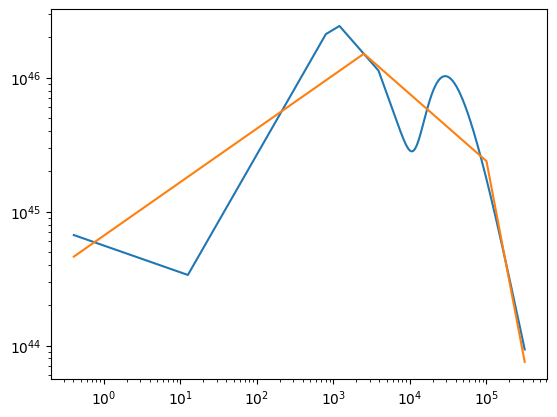

In [27]:
fig, ax = plt.subplots()
ax.plot(sed.fullsed_wavlen, sed.fullsed_luminosity_density*sed.fullsed_wavlen)
ax.plot(sed.fullsed_wavlen, sed_feltre)
ax.set_xscale("log")
ax.set_yscale("log")

In [87]:
sed.Lbol

1.021421089973874e+48

In [88]:
logic = (sed.fullsed_wavlen >= 12.4) & (sed.fullsed_wavlen <= 1e4)


feltre_bol = np.trapz(sed_feltre[logic]/sed.fullsed_wavlen[logic],
                       sed.fullsed_wavlen[logic])
print(feltre_bol)

9.640355431829438e+47


In [29]:
f5 = "qsogen_4_catalog/narrow_lines/A_Feltre_reduced.dat"
feltre_cat = pd.read_csv(f5, sep = ' ')

In [32]:
np.log10(10**feltre_cat["OIII_4959"]+10**feltre_cat["OIII_5007"])[1]

-1.9168737884609015